<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter Fake News Detection System</b></div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Fake News Detection System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict label label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
    Fake
    Real
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [2]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [4]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
# Read the Data in CSV Format
dataset = pd.read_csv('news.csv')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print("Training Data:")
print("=============\n")
dataset

Training Data:



Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [5]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (6335, 4)


In [6]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [7]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object


In [8]:
dataset.describe(include='all')

Unnamed: 0                          title  \
count    6335.000000                           6335   
unique           NaN                           6256   
top              NaN  OnPolitics | 's politics blog   
freq             NaN                              5   
mean     5280.415627                            NaN   
std      3038.503953                            NaN   
min         2.000000                            NaN   
25%      2674.500000                            NaN   
50%      5271.000000                            NaN   
75%      7901.000000                            NaN   
max     10557.000000                            NaN   

                                                     text label  
count                                                6335  6335  
unique                                               6060     2  
top     Killing Obama administration rules, dismantlin...  REAL  
freq                                                   58  3171  
mean                                                  NaN   NaN  
std                                                   NaN   NaN  
min                                                   NaN   NaN  
25%                                                   NaN   NaN  
50%                                                   NaN   NaN  
75%                                                   NaN   NaN  
max                                                   NaN   NaN

In [9]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

In [10]:
show_details(dataset)

Unnamed: 0  title  text  label
Missed_Values               0.0    0.0   0.0    0.0
Missed_Values %             0.0    0.0   0.0    0.0
Duplicated values           0.0    0.0   0.0    0.0
Duplicated values %         0.0    0.0   0.0    0.0

In [11]:
print('The Count of labels in the dataset : \n')
label =dataset.label.value_counts()
label.to_frame()

The Count of labels in the dataset : 



count
label       
REAL    3171
FAKE    3164

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [12]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

Unnamed: 0  title  text  label
Missed_Values               0.0    0.0   0.0    0.0
Missed_Values %             0.0    0.0   0.0    0.0
Duplicated values           0.0    0.0   0.0    0.0
Duplicated values %         0.0    0.0   0.0    0.0

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [15]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['text'] = dataset['text'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset.head(20)


Training Data After Pre-processing:



Unnamed: 0                                              title  \
0         8476                       You Can Smell Hillary’s Fear   
1        10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2         3608        Kerry to go to Paris in gesture of sympathy   
3        10142  Bernie supporters on Twitter erupt in anger ag...   
4          875   The Battle of New York: Why This Primary Matters   
5         6903                                        Tehran, USA   
6         7341  Girl Horrified At What She Watches Boyfriend D...   
7           95                  ‘Britain’s Schindler’ Dies at 106   
8         4869  Fact check: Trump and Clinton at the 'commande...   
9         2909  Iran reportedly makes new push for uranium con...   
10        1357  With all three Clintons in Iowa, a glimpse at ...   
11         988  Donald Trump’s Shockingly Weak Delegate Game S...   
12        7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13        7623       10 Ways America Is Preparing for World War 3   
14        1571                   Trump takes on Cruz, but lightly   
15        4739                         How women lead differently   
16        7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17        8716  Hillary Clinton in HUGE Trouble After America ...   
18        3304  What's in that Iran bill that Obama doesn't like?   
19        3078  The 1 chart that explains everything you need ...   

                                                 text label  
0   daniel greenfield shillman journalism fellow f...  FAKE  
1   google pinterest digg linkedin reddit stumbleu...  FAKE  
2   secretary state john kerry said monday stop pa...  REAL  
3   kaydee king november lesson tonights dem losse...  FAKE  
4   primary day new york frontrunners hillary clin...  REAL  
5   immigrant grandparents years ago arrived new y...  FAKE  
6   share baylee luciani left screenshot baylee ca...  FAKE  
7   czech stockbroker saved jewish children nazi g...  REAL  
8   hillary clinton donald trump made inaccurate c...  REAL  
9   iranian negotiators reportedly made lastditch ...  REAL  
10  cedar rapids iowa one wonderful rallies entire...  REAL  
11  donald trump organizational problems gone bad ...  REAL  
12  click learn alexandras personalized essences p...  FAKE  
13  october pretty factual except women selective ...  FAKE  
14  killing obama administration rules dismantling...  REAL  
15  women move high offices often bring style appr...  REAL  
16  shocking michele obama hillary caught glamoriz...  FAKE  
17  hillary clinton barely lost presidential elect...  FAKE  
18  washington cnn months white house congress wra...  REAL  
19  paging pews best data visualizations awesome c...  REAL

In [16]:
dataset

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     daniel greenfield shillman journalism fellow f...  FAKE  
1     google pinterest digg linkedin reddit stumbleu...  FAKE  
2     secretary state john kerry said monday stop pa...  REAL  
3     kaydee king november lesson tonights dem losse...  FAKE  
4     primary day new york frontrunners hillary clin...  REAL  
...                                                 ...   ...  
6330  state department told republican national comm...  REAL  
6331  pbs stand plutocratic pentagon posted oct wiki...  FAKE  
6332  antitrump protesters tools oligarchy reform al...  FAKE  
6333  addis ababa ethiopia president obama convened ...  REAL  
6334  jeb bush suddenly attacking trump heres matter...  REAL  

[6335 rows x 4 columns]

In [17]:
def filter_texts_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'text' column
    dataset['Num_Words'] = dataset['text'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_texts_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  daniel greenfield shillman journalism fellow f...  FAKE  
1  google pinterest digg linkedin reddit stumbleu...  FAKE  
2  secretary state john kerry said monday stop pa...  REAL  
3  kaydee king november lesson tonights dem losse...  FAKE  
4  primary day new york frontrunners hillary clin...  REAL

In [18]:
dataset

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     daniel greenfield shillman journalism fellow f...  FAKE  
1     google pinterest digg linkedin reddit stumbleu...  FAKE  
2     secretary state john kerry said monday stop pa...  REAL  
3     kaydee king november lesson tonights dem losse...  FAKE  
4     primary day new york frontrunners hillary clin...  REAL  
...                                                 ...   ...  
6330  state department told republican national comm...  REAL  
6331  pbs stand plutocratic pentagon posted oct wiki...  FAKE  
6332  antitrump protesters tools oligarchy reform al...  FAKE  
6333  addis ababa ethiopia president obama convened ...  REAL  
6334  jeb bush suddenly attacking trump heres matter...  REAL  

[6296 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [19]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 6296


In [20]:
dataset.describe()

Unnamed: 0
count   6296.000000
mean    5265.199651
std     3039.165735
min        2.000000
25%     2662.750000
50%     5239.500000
75%     7886.250000
max    10557.000000

In [21]:
print('The Count of labels in the dataset : \n')
label =dataset.label.value_counts()
label.to_frame().T

The Count of labels in the dataset : 



label  REAL  FAKE
count  3171  3125

In [22]:
print(f'The unique values of labels : {len(dataset.label.unique())}')
print('**' * 20)
print(dataset.label.unique())

The unique values of labels : 2
****************************************
['FAKE' 'REAL']



Number of instances and Classes in Training Dataset:



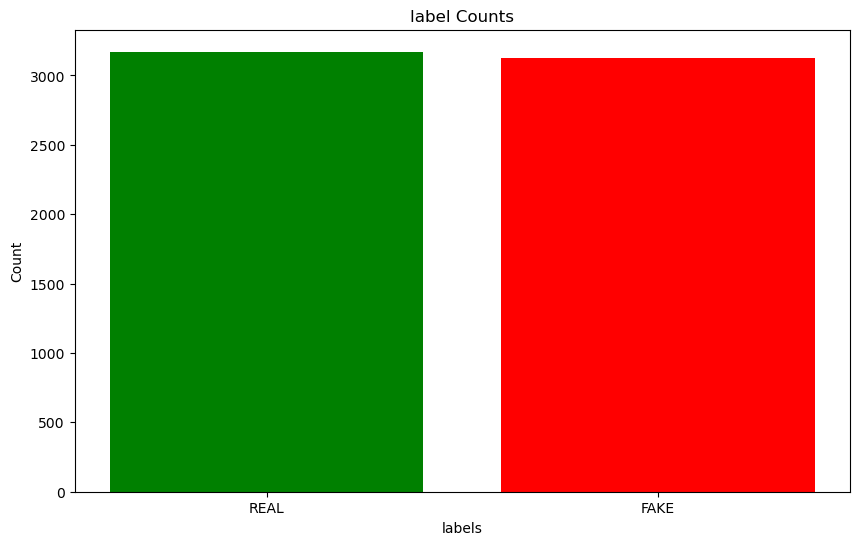

In [23]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming label_counts is a Pandas Series containing label counts
label_counts = dataset['label'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each label
colors = {'REAL': 'green', 'FAKE': 'red'}

# Create a bar graph with colored bars
plt.bar(label_counts.index, label_counts.values, color=[colors[sent] for sent in label_counts.index])

# Add labels and a title
plt.xlabel('labels')
plt.ylabel('Count')
plt.title('label Counts')

# Show the bar graph
plt.show()


In [24]:
import plotly.graph_objects as go

label_counts = dataset['label'].value_counts().sort_index()

label_labels = ['FAKE', 'REAL']
label_colors = ['red', 'green']


fig = go.Figure(data=[go.Pie(labels=label_counts.index, 
                             values=label_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=label_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='label Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


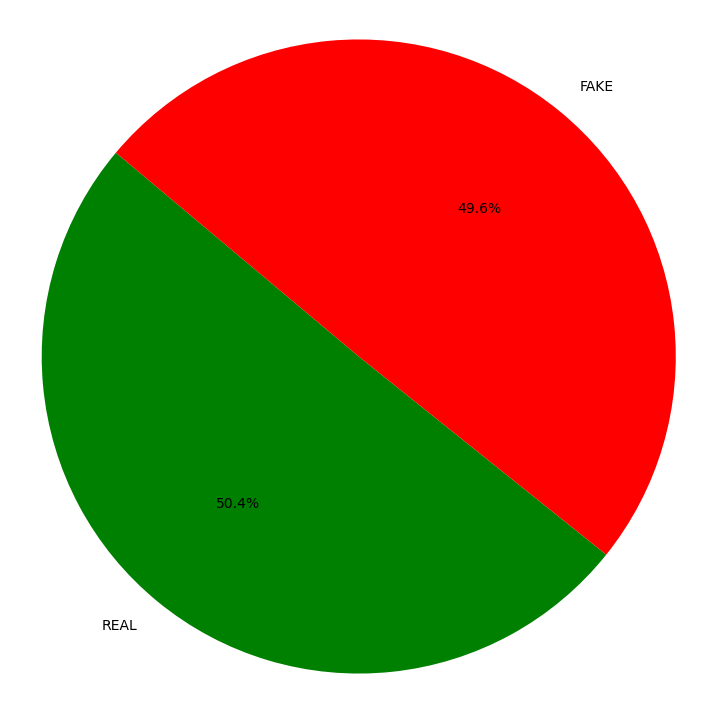

In [25]:
label_counts = dataset['label'].value_counts()

# Define colors for each label
colors = {'FAKE': 'red', 'REAL': 'green'}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in label_counts.index])
# plt.title("label Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Shape of the Training Data

In [26]:
dataset.shape

(6296, 4)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [27]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['text'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["label"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['text'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



text label  \
0  [daniel, greenfield, shillman, journalism, fel...  FAKE   
1  [google, pinterest, digg, linkedin, reddit, st...  FAKE   
2  [secretary, state, john, kerry, said, monday, ...  REAL   

                                        Token_Length  
0  [6, 10, 8, 10, 6, 7, 6, 3, 4, 6, 8, 7, 5, 5, 7...  
1  [6, 9, 4, 8, 6, 11, 5, 9, 6, 6, 3, 11, 6, 5, 4...  
2  [9, 5, 4, 5, 4, 6, 4, 5, 5, 4, 4, 9, 3, 8, 9, ...

### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [28]:
preprocessed_dataset['text length'] = preprocessed_dataset['text'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['text'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(3)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   

                                                text label  text length  \
0  daniel greenfield shillman journalism fellow f...  FAKE         4869   
1  google pinterest digg linkedin reddit stumbleu...  FAKE         1681   
2  secretary state john kerry said monday stop pa...  REAL         1731   

   word_count  
0         664  
1         228  
2         236

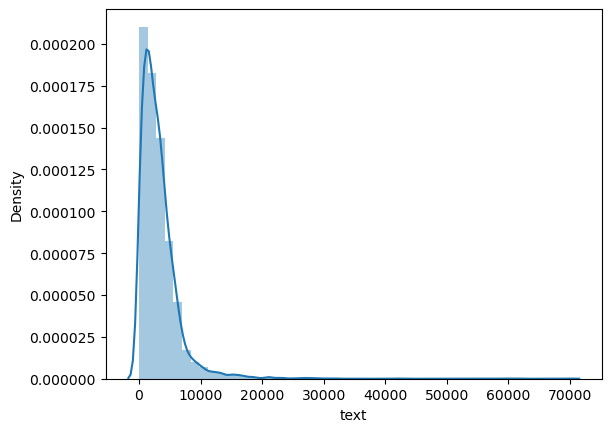

In [29]:
import seaborn as sns
text_length=preprocessed_dataset['text'].str.len()
sns.distplot(text_length)
plt.show()

In [30]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

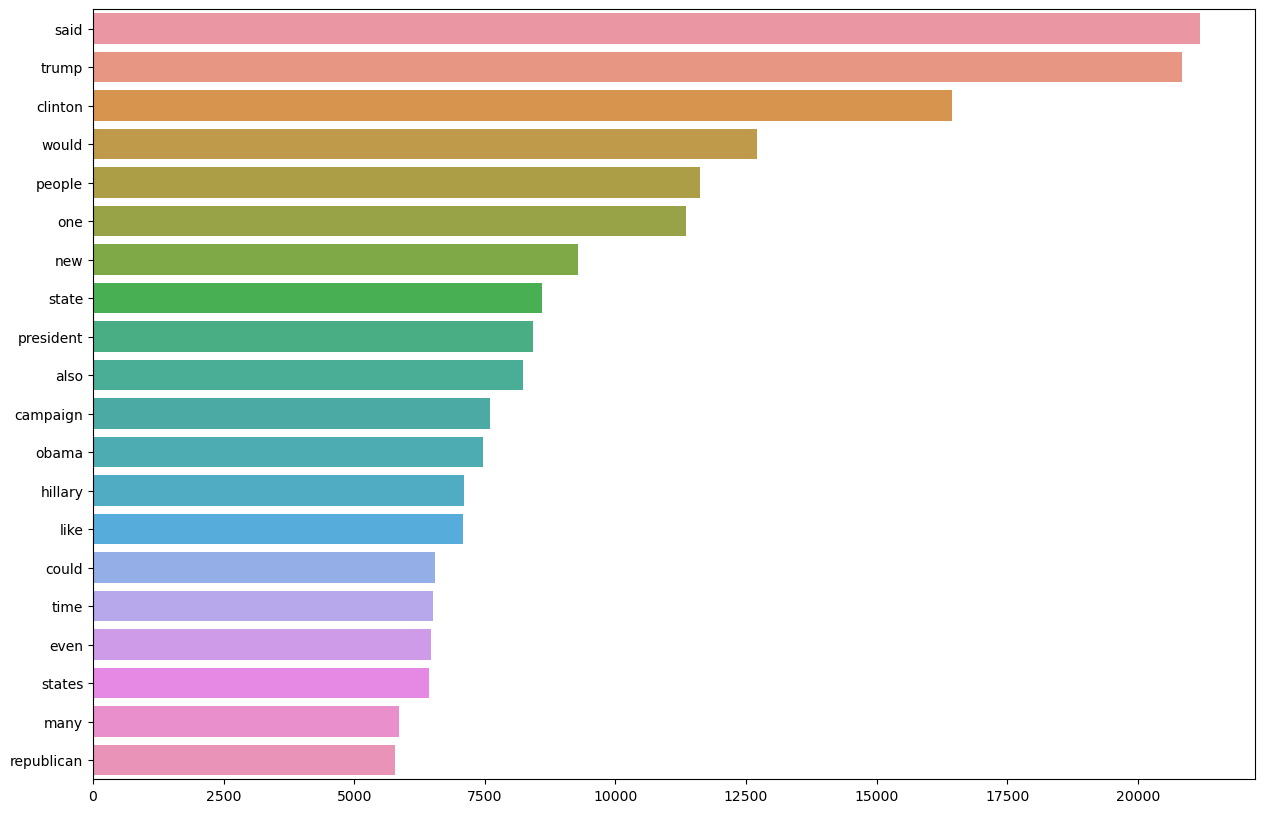

In [31]:
plot_top_non_stopwords_barchart(preprocessed_dataset['text'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

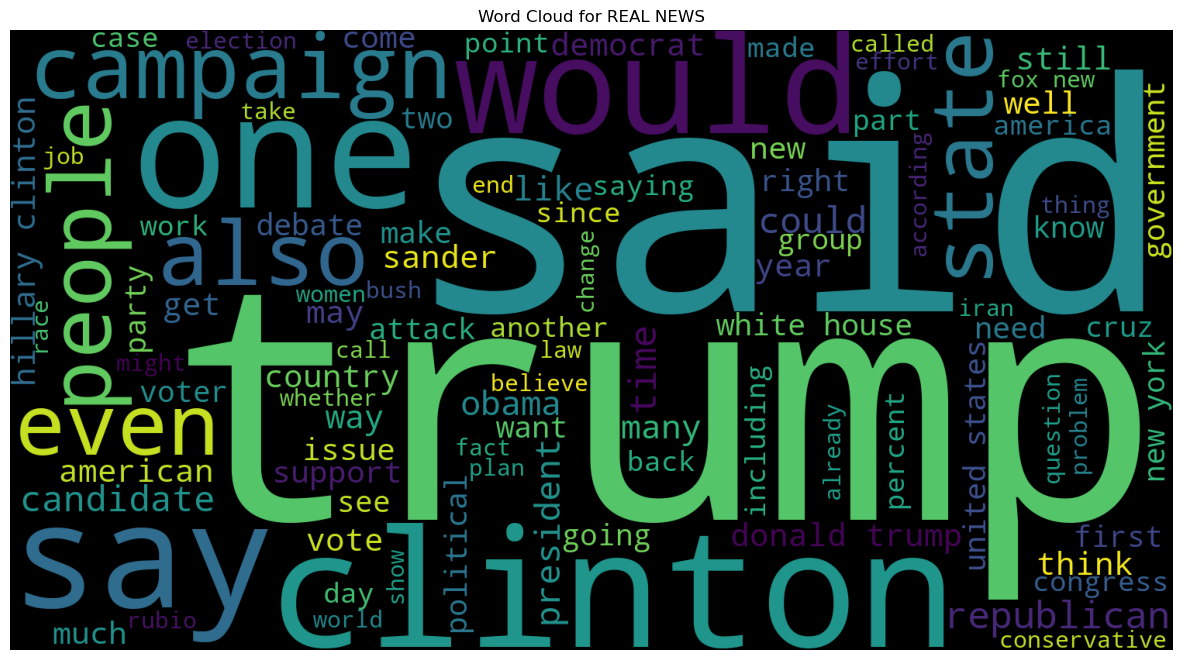

In [33]:
from wordcloud import WordCloud
stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['label'] == 'REAL']['text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for REAL NEWS')
plt.axis('off')
plt.show()


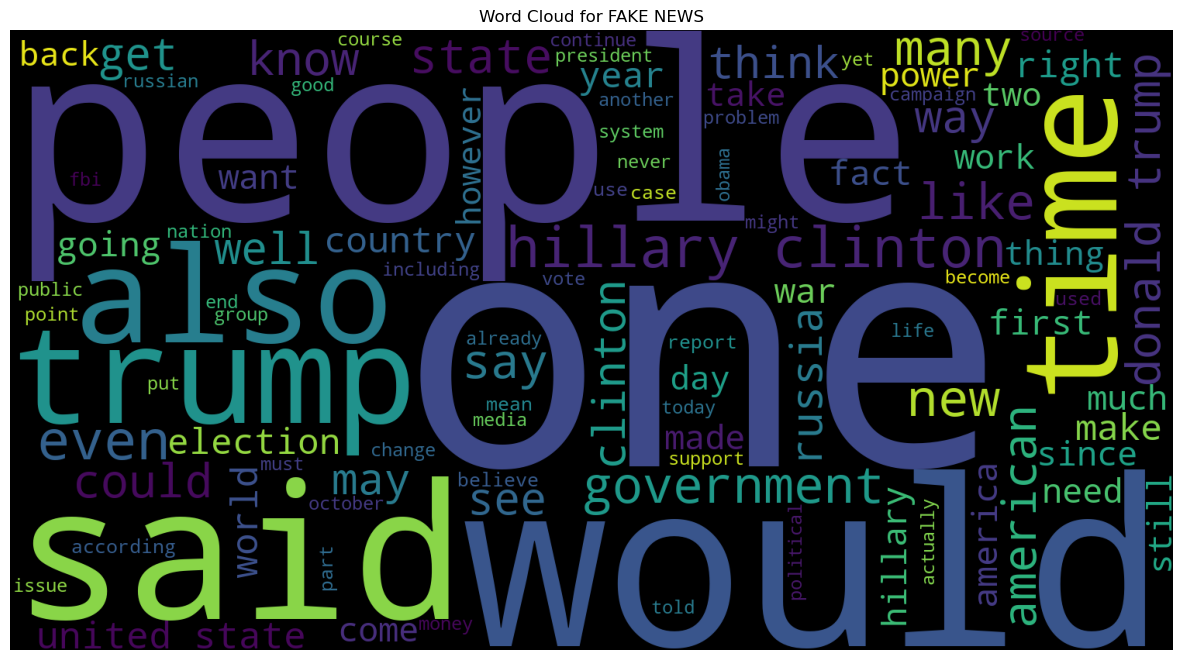

In [34]:
negative_reviews = dataset[dataset['label'] == 'FAKE']['text']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for FAKE NEWS')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [35]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

Word  count
0         said  21189
1        trump  20834
2      clinton  16431
3        would  12708
4       people  11622
5          one  11344
6          new   9274
7        state   8589
8    president   8415
9         also   8222
10    campaign   7595
11       obama   7463
12     hillary   7102
13        like   7080
14       could   6554
15        time   6516
16        even   6471
17      states   6426
18        many   5855
19  republican   5780

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

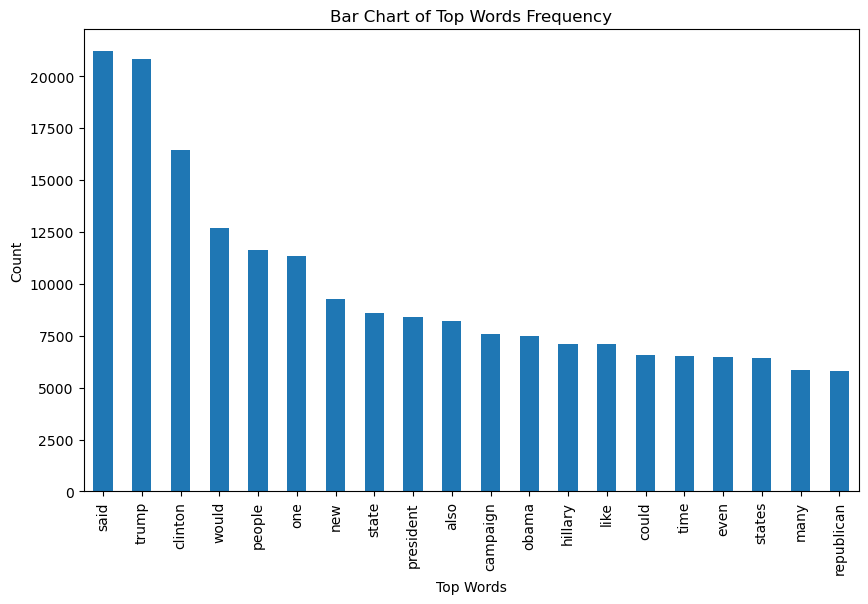

In [36]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [37]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['text'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

Text  Count
0  hillary clinton   4173
1     donald trump   3697
2    united states   3039
3      white house   2325
4         new york   2163
5         fox news   1215
6  president obama   1167
7  secretary state   1155
8    new hampshire    989
9    supreme court    934

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

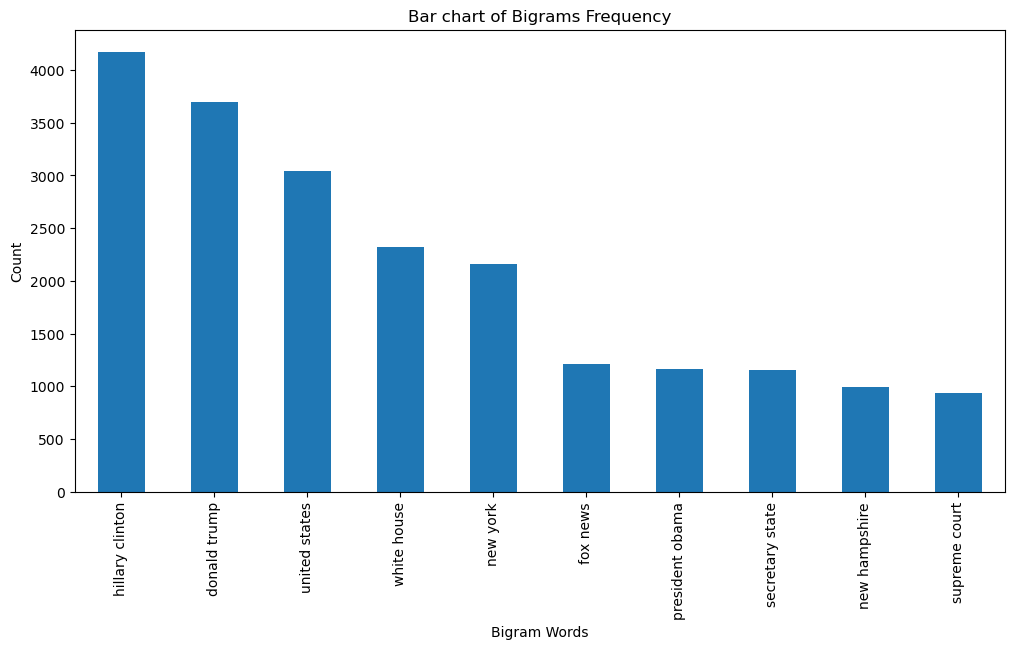

In [38]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [39]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)

## Convert Input of Training Data into Feature Vectors

In [40]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



abandon  abandoned  abc  abdullah  abedin  ability  able  abortion  \
0        0          0    0         0       1        0     0         0   
1        0          0    1         0       0        0     0         0   
2        0          0    0         0       0        0     0         0   
3        0          0    0         0       0        0     0         0   
4        0          0    0         0       0        0     0         0   

   abortions  abroad  ...  younger  youre  youth  youtube  youve  zero  zika  \
0          0       0  ...        0      0      0        0      0     0     0   
1          0       0  ...        0      0      0        0      0     1     0   
2          0       1  ...        0      0      0        0      0     0     0   
3          0       0  ...        0      0      0        0      0     0     0   
4          0       0  ...        0      0      0        0      0     0     0   

   zionist  zone  zones  
0        0     0      0  
1        0     0      0  
2        0     0      0  
3        0     0      0  
4        0     0      0  

[5 rows x 5000 columns]

# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [41]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["label"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



label
0  FAKE
1  FAKE
2  REAL
3  FAKE
4  REAL

In [42]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
dataset_output['label'] = label_encoder.fit_transform(dataset_output['label'])

In [43]:
dataset_output

label
0         0
1         0
2         1
3         0
4         1
...     ...
6330      1
6331      0
6332      0
6333      1
6334      1

[6296 rows x 1 columns]

In [44]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [45]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [46]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [47]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [48]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [50]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.82


Precision Score of Random Forest Classifier:

0.82


Recall Score of Random Forest Classifier:

0.82


F1 Score of Random Forest Classifier:

0.82


In [51]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       637
           1       0.81      0.84      0.83       623

    accuracy                           0.82      1260
   macro avg       0.82      0.82      0.82      1260
weighted avg       0.82      0.82      0.82      1260



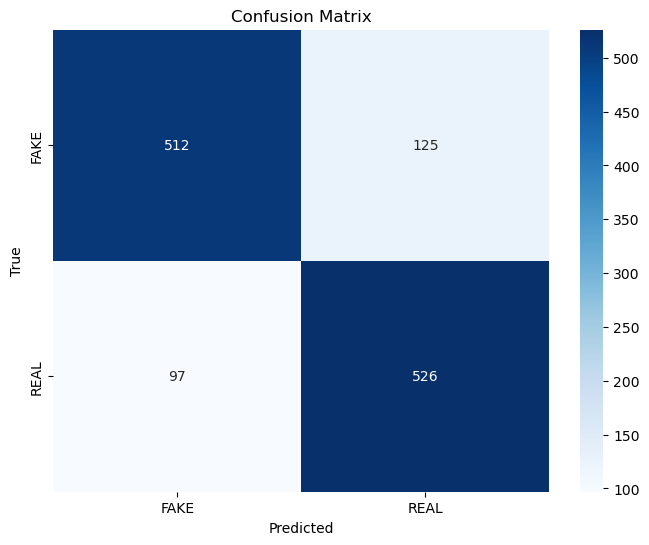

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [53]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.91

precision Score of LR_claasifier:

0.91


Recall Score of LR_claasifier:

0.91


F1 Score of LR_claasifier:

0.91


In [54]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       637
           1       0.90      0.91      0.90       623

    accuracy                           0.91      1260
   macro avg       0.91      0.91      0.91      1260
weighted avg       0.91      0.91      0.91      1260



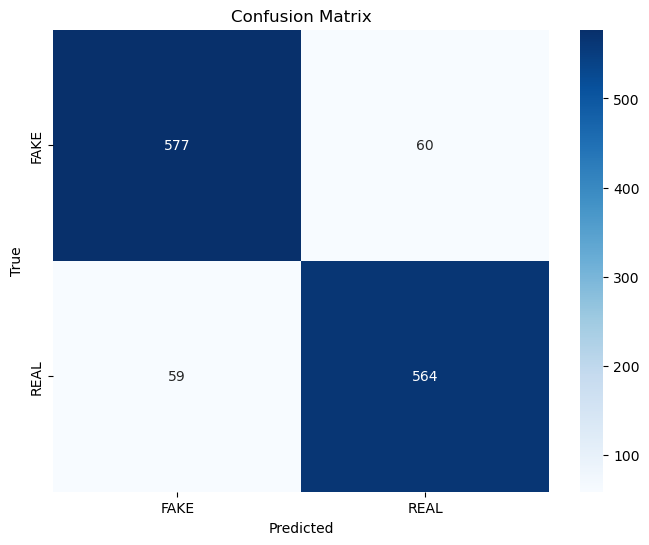

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [56]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.78


Precision Score of BernoulliNB:

0.78


Recall Score of BernoulliNB:

0.78


F1 Score of BernoulliNB:

0.78


In [57]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       637
           1       0.82      0.71      0.76       623

    accuracy                           0.78      1260
   macro avg       0.78      0.78      0.78      1260
weighted avg       0.78      0.78      0.78      1260



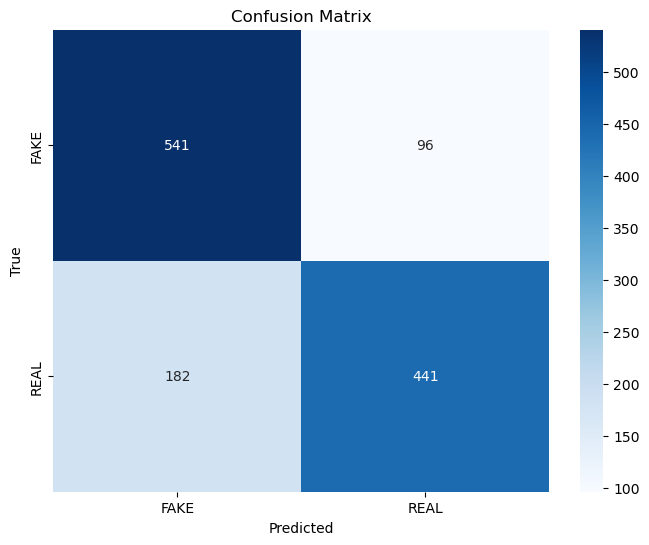

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [59]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.87

precision Score of LinearSVC:

0.87


Recall Score of LinearSVC:

0.87


F1 Score of LinearSVC:

0.87


In [60]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       637
           1       0.87      0.88      0.87       623

    accuracy                           0.87      1260
   macro avg       0.87      0.87      0.87      1260
weighted avg       0.87      0.87      0.87      1260



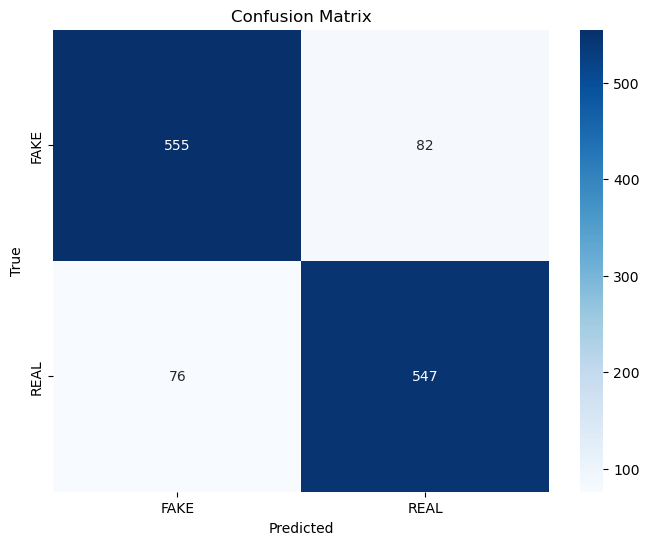

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [62]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.87

precision Score of MultinomialNB:

0.87


Recall Score of MultinomialNB:

0.87


F1 Score of MultinomialNB:

0.87


In [63]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       637
           1       0.87      0.86      0.86       623

    accuracy                           0.87      1260
   macro avg       0.87      0.87      0.87      1260
weighted avg       0.87      0.87      0.87      1260



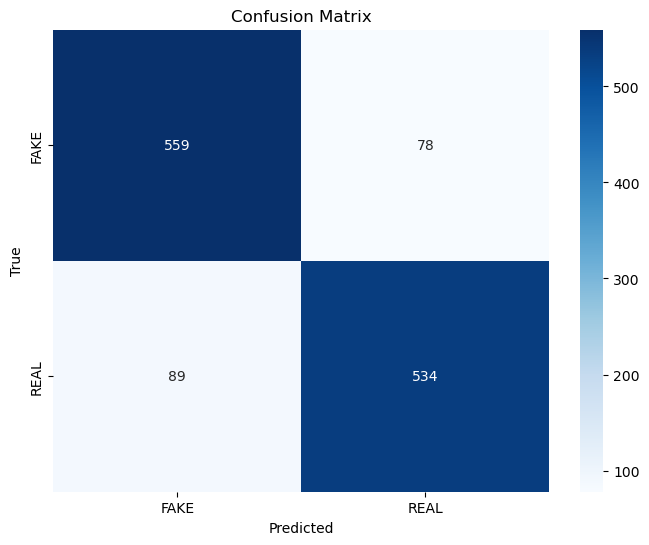

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [65]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.82   |    0.82   |  0.82  |   0.82   |
| Logistic Regression Classifier |   0.91   |    0.91   |  0.91  |   0.91   |
|     Bernoulli Naive Bayes      |   0.78   |    0.78   |  0.78  |   0.78   |
|           Linear SVC           |   0.87   |    0.87   |  0.87  |   0.87   |
|    Multinomial Naive Bayes     |   0.87   |    0.87   |  0.87  |   0.87   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | f1_score |
+--------------------------------+----------+-----------+--------+----------+
| Logi

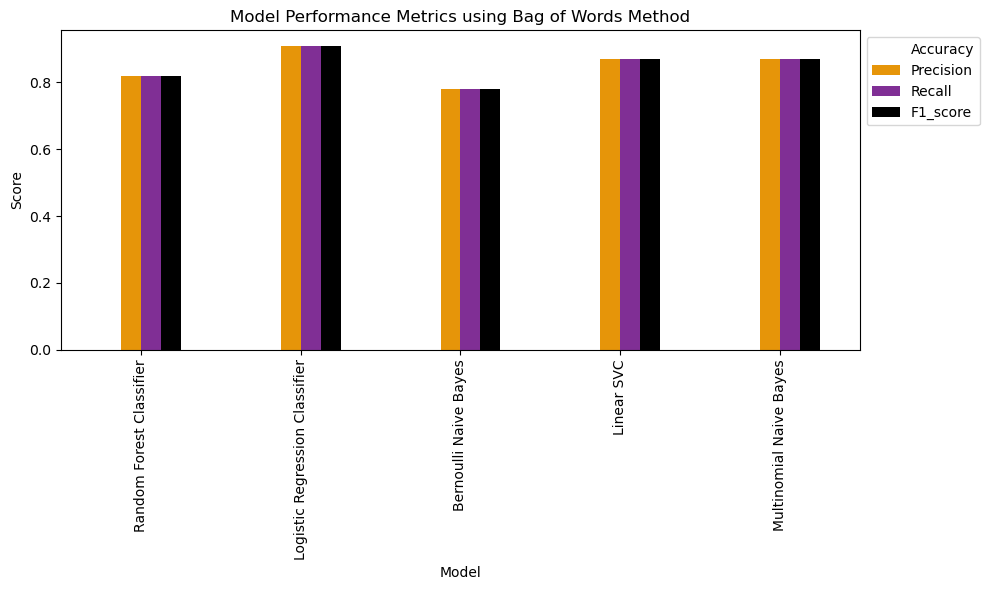

In [66]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='CMRmap_r')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [67]:
filename = 'updatedTrainedModel.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including Fake News Detection and trend identification in financial data.


In [68]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 3000 Features 
train_text = preprocessed_dataset['text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [69]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



abandon  abandoned   abc  abdullah  abedin  ability  able  abortion  \
0      0.0        0.0  0.00       0.0    0.03      0.0   0.0       0.0   
1      0.0        0.0  0.08       0.0    0.00      0.0   0.0       0.0   
2      0.0        0.0  0.00       0.0    0.00      0.0   0.0       0.0   
3      0.0        0.0  0.00       0.0    0.00      0.0   0.0       0.0   
4      0.0        0.0  0.00       0.0    0.00      0.0   0.0       0.0   

   abortions  abroad  ...  younger  youre  youth  youtube  youve  zero  zika  \
0        0.0    0.00  ...      0.0    0.0    0.0      0.0    0.0  0.00   0.0   
1        0.0    0.00  ...      0.0    0.0    0.0      0.0    0.0  0.07   0.0   
2        0.0    0.06  ...      0.0    0.0    0.0      0.0    0.0  0.00   0.0   
3        0.0    0.00  ...      0.0    0.0    0.0      0.0    0.0  0.00   0.0   
4        0.0    0.00  ...      0.0    0.0    0.0      0.0    0.0  0.00   0.0   

   zionist  zone  zones  
0      0.0   0.0    0.0  
1      0.0   0.0    0.0  
2      0.0   0.0    0.0  
3      0.0   0.0    0.0  
4      0.0   0.0    0.0  

[5 rows x 5000 columns]

In [70]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [71]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [72]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.82


Precision Score of Random Forest Classifier:

0.82


Recall Score of Random Forest Classifier:

0.82


F1 Score of Random Forest Classifier:

0.82


In [73]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       637
           1       0.80      0.85      0.83       623

    accuracy                           0.82      1260
   macro avg       0.82      0.82      0.82      1260
weighted avg       0.83      0.82      0.82      1260



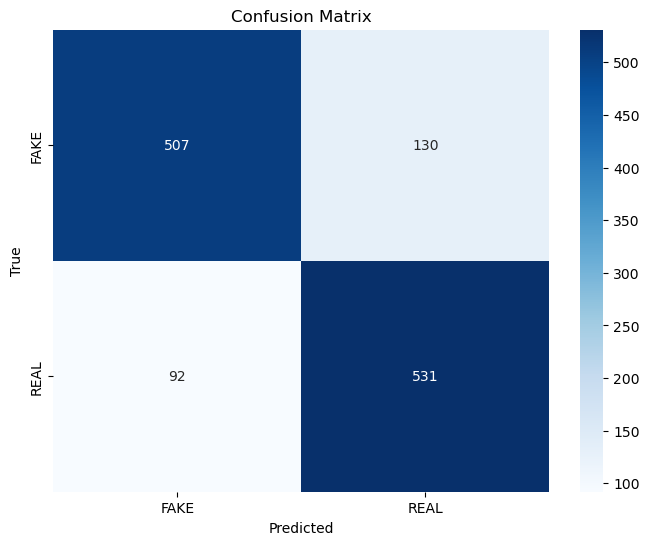

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [75]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [76]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.92

precision Score of LR_claasifier:

0.92


Recall Score of LR_claasifier:

0.92


F1 Score of LR_claasifier:

0.92


In [77]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       637
           1       0.93      0.90      0.92       623

    accuracy                           0.92      1260
   macro avg       0.92      0.92      0.92      1260
weighted avg       0.92      0.92      0.92      1260



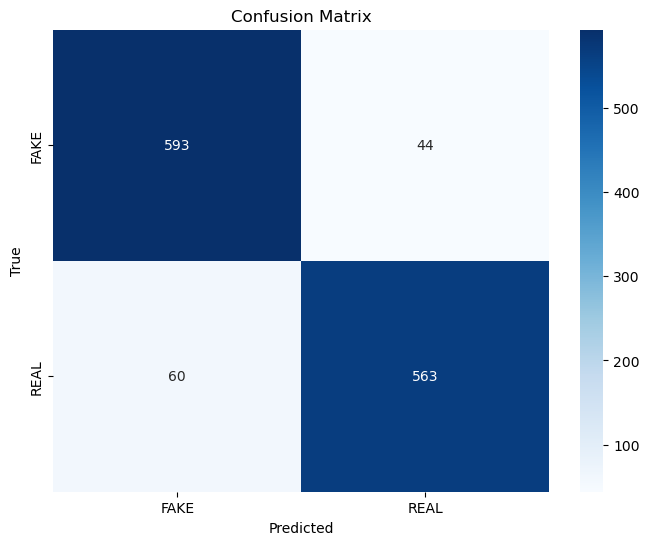

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [79]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [80]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.93

precision Score of LinearSVC:

0.93


Recall Score of LinearSVC:

0.93


F1 Score of LinearSVC:

0.93


In [81]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       637
           1       0.93      0.93      0.93       623

    accuracy                           0.93      1260
   macro avg       0.93      0.93      0.93      1260
weighted avg       0.93      0.93      0.93      1260



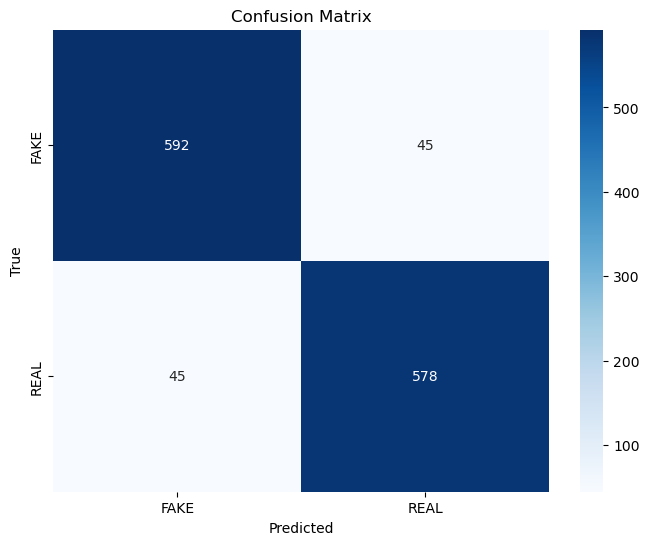

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [83]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [84]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.78


Precision Score of BernoulliNB:

0.78


Recall Score of BernoulliNB:

0.78


F1 Score of BernoulliNB:

0.78


In [85]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       637
           1       0.82      0.71      0.76       623

    accuracy                           0.78      1260
   macro avg       0.78      0.78      0.78      1260
weighted avg       0.78      0.78      0.78      1260



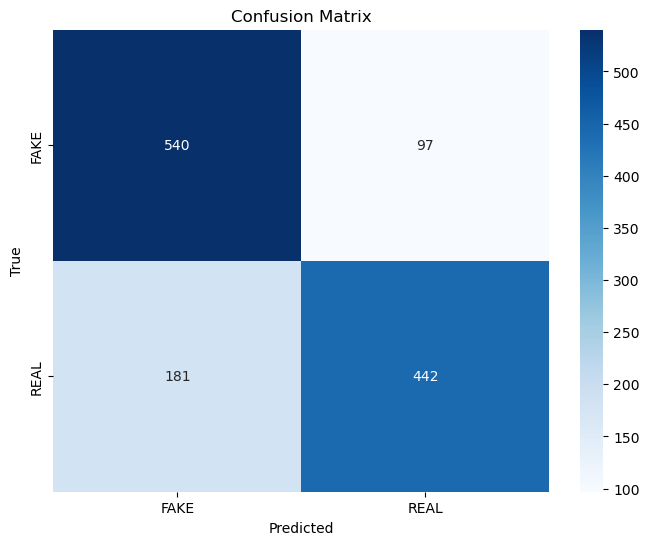

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [87]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [88]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.88

precision Score of MultinomialNB:

0.88


Recall Score of MultinomialNB:

0.88


F1 Score of MultinomialNB:

0.88


In [89]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       637
           1       0.88      0.87      0.88       623

    accuracy                           0.88      1260
   macro avg       0.88      0.88      0.88      1260
weighted avg       0.88      0.88      0.88      1260



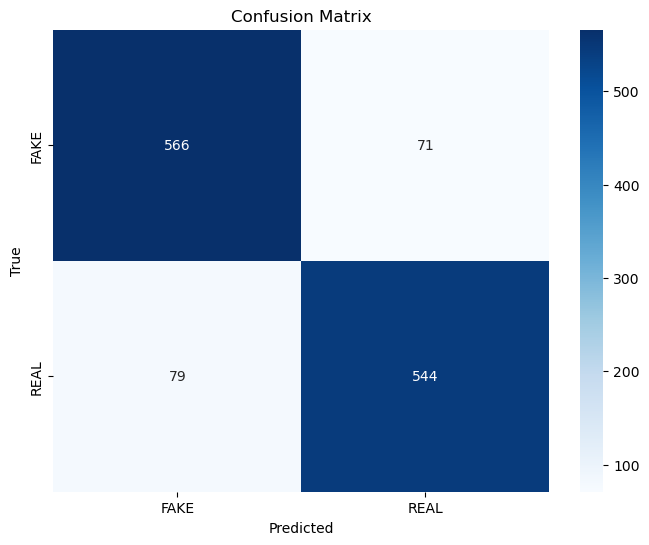

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["FAKE", "REAL"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [91]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.82   |    0.82   |  0.82  |   0.82   |
| Logistic Regression Classifier |   0.92   |    0.92   |  0.92  |   0.92   |
|     Bernoulli Naive Bayes      |   0.78   |    0.78   |  0.78  |   0.78   |
|           Linear SVC           |   0.93   |    0.93   |  0.93  |   0.93   |
|    Multinomial Naive Bayes     |   0.88   |    0.88   |  0.88  |   0.88   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+------------+----------+-----------+--------+----------+
|   Model    | Accuracy | Precision | Recall | f1_score |
+------------+----------+-----------+--------+----------+
| Linear SVC |   0.93   |    0.93   |  0.93  |   0.93   |
+-------

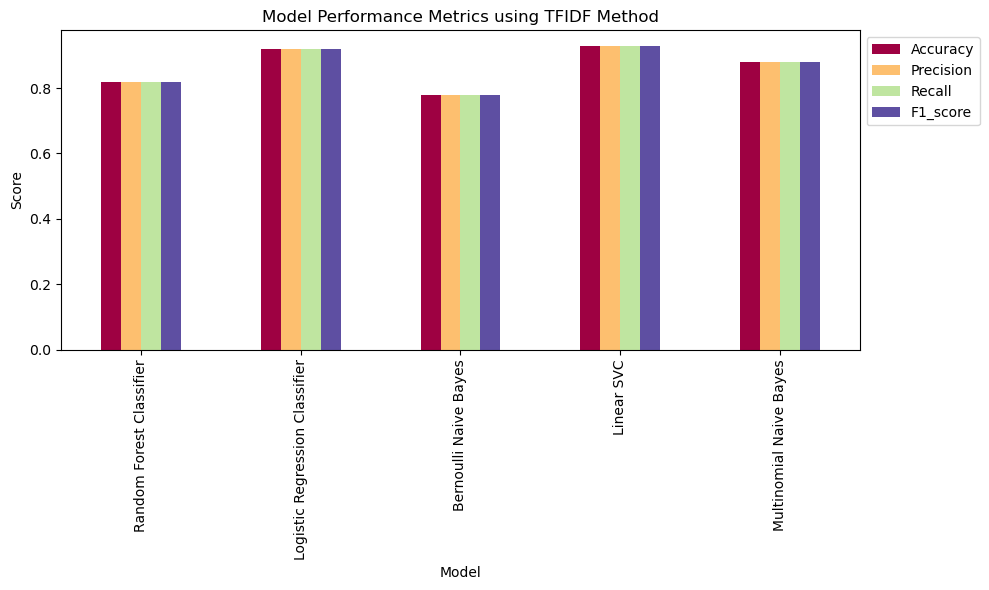

In [92]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [93]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [94]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [96]:
def make_Prediction(text):
    if text == 0:
        emotion ="FAKE"
    elif text == 1:
        emotion ="REAL"
    return emotion

In [97]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [98]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [99]:
root = Tk()
root.title('Fake News Detection System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Fake News Detection System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the text',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='label: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()